Data analysis and exploration of Cooperative Congressional Election Study

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi%3A10.7910/DVN/ZSBZ7K

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import numpy as np
import folium as folium
import scipy.stats as st
sns.set(color_codes=True)

In [89]:
df = pd.read_csv('cces18_common_vv.csv', header='infer')
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (283,290,464,471) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [90]:
df.head()

,caseid,commonweight,commonpostweight,vvweight,vvweight_post,tookpost,CCEStake,birthyr,gender,educ,race,race_other,hispanic,marstat,multrace_1,multrace_2,multrace_3,multrace_4,multrace_5,multrace_8,multrace_97,multrace_98,multrace_99,CC18_354a_1,CC18_354a_2,CC18_354a_3,CC18_354a_4,CC18_354a_5,CC18_354a_6,CC18_354a_7,CC18_354a_8,CC18_354a_9,CC18_354a_10,CC18_354a_11,CC18_354a_12,CC18_354a_t,CC18_354b_1,CC18_354b_2,CC18_354b_3,CC18_354b_4,CC18_354b_5,CC18_354b_6,CC18_354b_7,CC18_354b_8,CC18_354b_9,CC18_354b_10,CC18_354b_11,CC18_354b_12,CC18_354b_13,CC18_354b_14,CC18_354b_15,CC17_3534_t,comptype,add_confirm,inputzip,votereg,votereg_f,regzip,OScode,CompRating,region,sample_group,ccesmodule,CC18_300_1,CC18_300_2,CC18_300_3,CC18_300_4,CC18_300_5,CC18_300_6,CC18_300b,CC18_300c,CC18_300d_1,CC18_300d_2,CC18_300d_3,CC18_300d_4,CC18_300d_5,CC18_301,CC18_302,CC18_303_1,CC18_303_2,CC18_303_3,CC18_303_4,CC18_303_5,CC18_303_6,CC18_303_7,CC18_303_8,CC18_303_9,CC18_303_10,CC18_303_11,CC18_308a,CC18_308b,CC18_308c,CC18_308d,CC18_308e,CC18_309a,CC18_309b,CC18_309c,CC18_309d,CC18_310a,CC18_310b,CC18_310c,CC18_310d,CC18_311a,CC18_311b,CC18_311c,CC18_316,CC18_317,CC18_318a,CC18_320a,CC18_320c,CC18_320d,CC18_321a,CC18_321b,CC18_321c,CC18_321d,CC18_321e,CC18_321f,CC18_322a,CC18_322b,CC18_322c_new,CC18_322d_new,CC18_322c,CC18_322f,CC18_325a,CC18_325b,CC18_325c,CC18_325d,CC18_325e_new,CC18_325f_new,CC18_326,CC18_327a,CC18_327c,CC18_327d,CC18_327e,CC18_328b,CC18_328d,CC18_328e,CC18_328f,CC18_331a,CC18_331b,CC18_331c,CC18_332a,CC18_332b,CC18_332c,CC18_332e,CC18_334A,CC18_334B,CC18_334C,CC18_334D,CC18_334E,CC18_334F,CC18_334G,CC18_334H,CC18_334I,CC18_334J,CC18_334I2,CC18_334J2,CC18_334M,CC18_334N,CC18_334O,CC18_335,CC18_350,CC18_351,CC18_351_t,CC18_351a,CC18_351a_t,CC18_351b,CC18_351b_t,CC18_351c,CC18_351c_t,CC18_352,CC18_352_t,CC18_352a,CC18_352a_t,CC18_353,CC18_353_t,CC18_353a,CC18_353a_t,CC18_351x,CC18_351x_t,CC18_351bx,CC355bx_t,CC18_352x,CC18_352x_t,CC18_353x,CC18_353x_t,pid3,pid3_t,pid7,ownhome,ownhome_t,milstat_1,milstat_2,milstat_3,milstat_4,milstat_5,cit1,immstat,employ,employ_t,hadjob,urbancity,urbancity_t,citylength_1,citylength_2,child18,child18num,union,union_coverage,unionhh,investor,healthins_1,healthins_2,healthins_3,healthins_4,healthins_5,healthins_6,healthins_7,healthins2,internethome,internetwork,sexuality,trans,industryclass,pew_bornagain,pew_religimp,pew_churatd,pew_prayer,religpew,religpew_t,religpew_protestant,religpew_protestant_t,religpew_baptist,religpew_baptist_t,religpew_methodist,religpew_methodist_t,religpew_nondenom,religpew_nondenom_t,religpew_lutheran,religpew_lutheran_t,religpew_presby,religpew_presby_t,religpew_pentecost,religpew_pentecost_t,religpew_episcop,religpew_episcop_t,religpew_christian,religpew_christian_t,religpew_congreg,religpew_congreg_t,religpew_holiness,religpew_holiness_t,religpew_reformed,religpew_reformed_t,religpew_advent,religpew_advent_t,religpew_catholic,religpew_catholic_t,religpew_mormon,religpew_mormon_t,religpew_orthodox,religpew_orthodox_t,religpew_jewish,religpew_jewish_t,religpew_muslim,religpew_muslim_t,religpew_buddhist,religpew_buddhist_t,religpew_hindu,religpew_hindu_t,ideo5,newsint,faminc_new,lookupzip,inputstate,cdid115,cdid116,HouseCand1Name,HouseCand2Name,HouseCand3Name,HouseCand4Name,HouseCand5Name,HouseCand6Name,HouseCand7Name,HouseCand1Party,HouseCand2Party,HouseCand3Party,HouseCand4Party,HouseCand5Party,HouseCand6Party,HouseCand7Party,SenCand1Name,SenCand2Name,SenCand3Name,SenCand1Party,SenCand2Party,SenCand3Party,SenCand1Name2,SenCand2Name2,SenCand3Name2,SenCand1Party2,SenCand2Party2,SenCand3Party2,GovCand1Name,GovCand2Name,GovCand3Name,GovCand1Party,GovCand2Party,GovCand3Party,CurrentHouseName,CurrentHouseParty,CurrentSen1Name,CurrentSen2Name,CurrentSen1Party,CurrentSen2Party,CurrentGovName,CurrentGovParty,LowerChamberName,LegName,countyfips,countyname,regzip_confirm_post,reszip_confirm_post,inputzip_post,votereg_post,votereg_f_post,regzip_post,OScode_post,CompRating_post,CC18

In [91]:
from itertools import chain

f1=df.columns.get_loc('caseid')#f1tof2
f2=df.columns.get_loc('race')#f1tof2
f3=df.columns.get_loc('marstat')#f3
f4=df.columns.get_loc('votereg')#f4
#f5=df.columns.get_loc('OScode')#no idea whay is that
#f6=df.columns.get_loc('ccesmodule') #no idea whay is that
f7=df.columns.get_loc('pid3')#f7 democrat-republican-independant
f8=df.columns.get_loc('pid7')#f7 democrat-republican
f9=df.columns.get_loc('ownhome')
#milstat - military stat- could be joined to military relationship -yes-no
f10=df.columns.get_loc('cit1')
f11=df.columns.get_loc('employ')
f12=df.columns.get_loc('hadjob')
f13=df.columns.get_loc('urbancity')
f14=df.columns.get_loc('child18')
#unions - could be joined to union relationship -yes-no (union	union_coverage	unionhh)
f15=df.columns.get_loc('urbancity')
#healthins - could be joined
#internet - yes or not (internethome	internetwork)
f16=df.columns.get_loc('sexuality')
f17=df.columns.get_loc('trans')
f18=df.columns.get_loc('religpew')
f19=df.columns.get_loc('ideo5')#conservative- not
f20=df.columns.get_loc('lookupzip')#no info on pdf 
f21=df.columns.get_loc('inputstate')
f22=df.columns.get_loc('countyfips')#if we want name instead of code-countyname
f23=df.columns.get_loc('votereg_post') # registered or not to vote
f24=df.columns.get_loc('numchildren') 
f25=df.columns.get_loc('edloan') 
f26=df.columns.get_loc('CL_matched')# CL_matched
f27=df.columns.get_loc('dmaname')
# HouseCand1Name - HouseCand7Name
# HouseCand1Party - HouseCand7Party
# SenCand1Name - SenCand3Name 
# SenCand1Party - SenCand3Party
# SenCand1Name2 - SenCand3Name2 
# SenCand1Party2 - SenCand3Party2
# GovCand1Name - GovCand3Name
# GovCand1Party - GovCand3Party 
# CurrentHouseName - 
# CurrentHouseParty	
# CurrentSen1Name
#CurrentSen2Name
#CurrentSen1Party
#CurrentSen2Party
#CurrentGovName
#CurrentGovParty
#LowerChamberName
ColumnList=[list(range(f1,f2+1)),
            [f3,f4,f7,f8,f9],
            list(range(f10,f11+1)),
            [f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27]]
ColumnList=list(chain.from_iterable(ColumnList))

In [328]:
df_interest=df.iloc[:,ColumnList]
df_interest.head()

,caseid,commonweight,commonpostweight,vvweight,vvweight_post,tookpost,CCEStake,birthyr,gender,educ,race,marstat,votereg,pid3,pid7,ownhome,cit1,immstat,employ,hadjob,urbancity,child18,urbancity,sexuality,trans,religpew,ideo5,lookupzip,inputstate,countyfips,votereg_post,numchildren,edloan,CL_matched,dmaname
0,123464282,0.94,0.79,0.74,0.64,2,1,1964,2,4,5,1.0,1,3.0,5.0,1.0,1.0,5.0,7.0,1.0,2.0,2.0,2.0,1.0,2.0,12.0,4.0,21061,24,24003.0,1.0,1.0,2.0,2,BALTIMORE
1,170169205,0.77,0.74,0.43,0.42,2,1,1971,2,2,1,1.0,1,2.0,7.0,1.0,1.0,5.0,7.0,2.0,3.0,2.0,3.0,1.0,2.0,1.0,5.0,37650,47,47171.0,1.0,0.0,2.0,2,"""TRI-CITIES"
2,175996005,1.49,1.31,1.70,1.60,2,1,1958,2,3,1,5.0,1,2.0,7.0,2.0,1.0,5.0,5.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,5.0,45662,39,39145.0,1.0,0.0,2.0,2,CHARLESTON-HUNTINGTON
3,176818556,5.10,4.63,5.95,5.66,2,1,1946,2,6,4,1.0,1,3.0,3.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,92637,6,6059.0,1.0,0.0,2.0,2,LOS ANGELES
4,202120533,0.47,0.37,0.41,0.42,2,1,1972,2,2,1,1.0,1,1.0,2.0,1.0,1.0,5.0,6.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,40229,21,21111.0,1.0,3.0,2.0,2,LOUISVILLE


STATE distribution Visualization

In [93]:
state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}

In [329]:
for k in state_codes: state_codes[k] = int(state_codes[k])
inv_map = {v: k for k, v in state_codes.items()}

In [330]:
temp_value=df_interest.iloc[:,-7].map(inv_map)#-7 = inputstate # used for stop indexer warning
df_interest.loc[:,'inputstate']=temp_value

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [331]:
state_counts=df_interest.groupby("inputstate")["inputstate"].count()
state_counts=state_counts/state_counts.sum()


In [336]:
map = folium.Map(location=[36, -100], zoom_start=4, tiles="Stamen toner")
map.choropleth(geo_data='us_states.geojson', data=state_counts,
             key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Participation Rate (%)')
map

Age  visualization 

In [243]:

df_interest['binned_age']=df_interest.loc[:,"birthyr"].apply(lambda x: int(np.floor((2018-x)/10)*10))
bin_age_counts=df_interest.groupby("binned_age")["binned_age"].count()
bin_age_counts=bin_age_counts/bin_age_counts.sum()

<ipython-input-243-12f8fee23030>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest['binned_age']=df_interest.loc[:,"birthyr"].apply(lambda x: int(np.floor((2018-x)/10)*10))


In [245]:
df_interest['age']=df_interest.loc[:,"birthyr"].apply(lambda x: 2018-x)
age_counts=df_interest.groupby("age")["age"].count()
age_counts=age_counts/age_counts.sum()

<ipython-input-245-aced60e5bddf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest['binned_age']=df_interest.loc[:,"birthyr"].apply(lambda x: 2018-x)


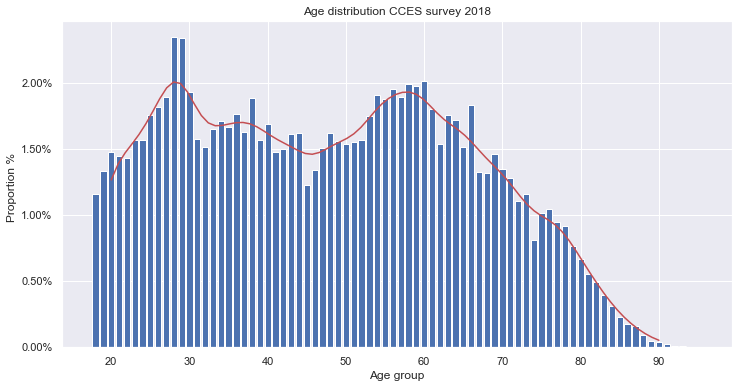

In [284]:
plt.figure(figsize = [12, 6])
plt.bar(age_counts.keys().to_list(),list(age_counts.values), width=0.8)
#plt.xticks(age_counts.keys().to_list())
plt.xlabel('Age group')
plt.ylabel('Proportion %  ')
plt.title('Age distribution CCES survey 2018')
#kde
x = np.linspace(20, 90, 80)
kde = st.gaussian_kde(df_interest['binned_age'])
plt.plot(x, kde.pdf(x),'r-')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Gender visualization

In [308]:
gender_counts=df_interest.groupby("gender")["gender"].count()
gender_counts=gender_counts/gender_counts.sum()

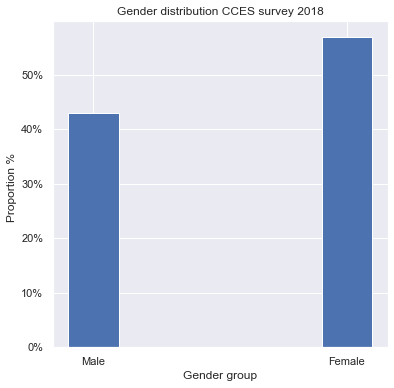

In [312]:
plt.figure(figsize = [6, 6])
plt.bar(gender_counts.keys().to_list(),list(gender_counts.values), width=0.2)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(ticks=gender_counts.keys(), labels=['Male','Female'])
plt.xlabel('Gender group')
plt.ylabel('Proportion %  ')
plt.title('Gender distribution CCES survey 2018')
plt.show()

Education viz

In [319]:
educ_counts=df_interest.groupby("educ")["educ"].count()
educ_counts=educ_counts/educ_counts.sum()

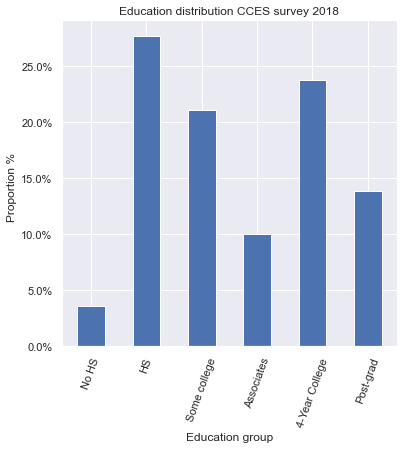

In [335]:
plt.figure(figsize = [6, 6])
plt.bar(educ_counts.keys().to_list(),list(educ_counts.values), width=0.5)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(ticks=educ_counts.keys(),
           labels=["No HS", "HS", "Some college", "Associates", "4-Year College", "Post-grad"],
           rotation=70)
plt.xlabel('Education group')
plt.ylabel('Proportion %  ')
plt.title('Education distribution CCES survey 2018')
plt.show()

race viz

In [323]:
race_counts=df_interest.groupby("race")["race"].count()
race_counts=race_counts/race_counts.sum()

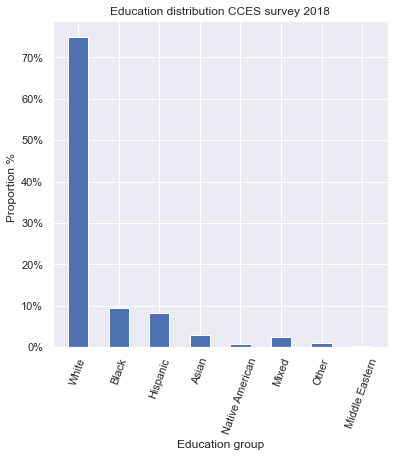

In [333]:
plt.figure(figsize = [6, 6])
plt.bar(race_counts.keys().to_list(),list(race_counts.values), width=0.5)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(ticks=race_counts.keys(),
           labels=["White", "Black", "Hispanic", "Asian", "Native American", "Mixed", "Other", "Middle Eastern"],
           rotation=70)
plt.xlabel('Education group')
plt.ylabel('Proportion %  ')
plt.title('Education distribution CCES survey 2018')
plt.show()